# Analisis de eventos por video 

In [1]:
import json
import matplotlib.pyplot as plt
from tabulate import tabulate

## Funcion: Cambio de codigos por un nombre clave 

In [2]:
def reemplazar_codigos_por_nombres(datos_eventos, mapeo_codigos):
    """
    Reemplaza los códigos de video en un diccionario anidado por sus nombres correspondientes.
    
    :param datos_eventos: Diccionario con códigos de video y sus conteos por evento.
    :param mapeo_codigos: Diccionario que mapea nombres de videos a códigos.
    :return: Nuevo diccionario con nombres de videos como claves.
    """
    codigo_a_nombre = {codigo: nombre for nombre, codigo in mapeo_codigos.items()}
    
    datos_con_nombres = {
        evento: {
            codigo_a_nombre.get(codigo, f"Desconocido ({codigo})"): conteo
            for codigo, conteo in conteos.items()
        } for evento, conteos in datos_eventos.items()
    }
    return datos_con_nombres

## Lista de codigos y sus nombres

In [3]:
# Ejemplo de uso:
mapeo_codigos = {
    "video_intro": "vKq2NotGPJQ",
    "LR_1_Video1_Semana1": "U3cK1QMIIEQ",
    "LR_1_Video2_Semana1": "9aNQZ9dKXRY",
    "LR_1_Video3_Semana1": "lsNxh-lSpCY",
    "LR_1_Video4_Semana1": "C3LnEvN0qZ0",
    "LR_1_Video5_Semana1": "vbpbkQE5K_Q",
    "LR_1_Video6_Semana1": "zCFa0xjGXGQ",
    "LR_1_Video7_Semana1": "qlS7ShZfb-c",
    "LR_1_Video8_Semana1": "8cKRb9CKtxk",
    "LR_1_Video9_Semana1": "WyrfIZ6VBcM",
    "LR_1_Video10_Semana1": "NgUhK3rw1IE",
    "LR_1_Video11_Semana1": "ttP0EyzSbbo",
    "LR_1_Video12_Semana1": "Vy4FWDyjZo4",
    "LR_2_Video1_Semana1": "leg7NPlfNf0",
    "LR_2_Video2_Semana1": "avTMbQWrFgM",
    "LR_2_Video3_Semana1": "cNoUwGM1DQs",
    "LR_2_Video4_Semana1": "6Mst559v-Uc",
    "LR_2_Video5_Semana1": "CNQpefXv5DY",
    "LR_2_Video_Semana1": "6W1_fBZFqns",
    "LR_1_Video1_Semana2": "o5VwDVJ7N3Q",
    "LR_1_Video2_Semana2": "LluqYlh2xg4",
    "LR_1_Video3_Semana2": "eE658thjDj8",
    "LR_1_Video4_Semana2": "QbEpClHzTeM",
    "LR_1_Video5_Semana2": "MCG0or2ULB4",
    "LR_1_Video6_Semana2": "ol-vGTdHBNU",
    "LR_1_Video7_Semana2": "WTXS0IMQ3Ss",
    "LR_1_Video8_Semana2": "9kqXmM3b3wc",
    "VS1_Video1_Semana2": "_zQHV3vCGpA",
    "VS2_Video2_Semana2": "RropOrUc2AE",
    "Video1_Semana3": "VGHSSIUyFhI",
    "Video1_Semana4": "kyGRuJXaboU",
}

## Eventos por Video

In [4]:
def graficar_eventos(ruta_base, archivos_eventos, mapeo_codigos):
    """
    Genera una gráfica comparativa de eventos (play, stop, pause, etc.)
    para los códigos de video desde múltiples archivos JSONL.

    :param ruta_base: Ruta base donde se encuentran los archivos.
    :param archivos_eventos: Diccionario donde las claves son etiquetas para los eventos (e.g., 'Play', 'Stop')
    y los valores son los nombres de los archivos correspondientes.
    :param mapeo_codigos: Diccionario que mapea nombres de videos a códigos.
    """
    conteos = {evento: {} for evento in archivos_eventos.keys()}

    try:
        # Leer y contar eventos para cada archivo
        for evento, archivo in archivos_eventos.items():
            with open(ruta_base + archivo, 'r', encoding='utf-8') as archivo_jsonl:
                for linea in archivo_jsonl:
                    if linea.strip():
                        try:
                            objeto = json.loads(linea.strip())
                            evento_json = json.loads(objeto.get('event', '{}'))
                            codigo_video = evento_json.get('code', '')
                            if codigo_video:
                                conteos[evento][codigo_video] = conteos[evento].get(codigo_video, 0) + 1
                        except json.JSONDecodeError as e:
                            print(f"Error al decodificar línea en {archivo}: {e}")

        # Reemplazar códigos por nombres de videos
        conteos_con_nombres = reemplazar_codigos_por_nombres(conteos, mapeo_codigos)

        # Unir todos los nombres de video
        codigos = sorted(set().union(*[conteo.keys() for conteo in conteos_con_nombres.values()]))

        # Preparar datos para la gráfica
        datos = {evento: [conteo.get(codigo, 0) for codigo in codigos] for evento, conteo in conteos_con_nombres.items()}

        # Crear gráfica
        plt.figure(figsize=(12, 6))
        ancho_barra = 0.8 / len(archivos_eventos)  # Ajustar ancho para múltiples eventos
        x = range(len(codigos))

        for i, (evento, valores) in enumerate(datos.items()):
            plt.bar(
                [pos + i * ancho_barra for pos in x],
                valores,
                width=ancho_barra,
                label=evento
            )

        plt.xlabel('Nombre del Video', fontsize=12)
        plt.ylabel('Cantidad de Eventos', fontsize=12)
        plt.title('Comparación de Eventos por Video', fontsize=14)
        plt.xticks([pos + (len(archivos_eventos) - 1) * ancho_barra / 2 for pos in x], codigos, rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()

        # Mostrar gráfica
        plt.show()

    except Exception as e:
        print(f"Error general: {e}")


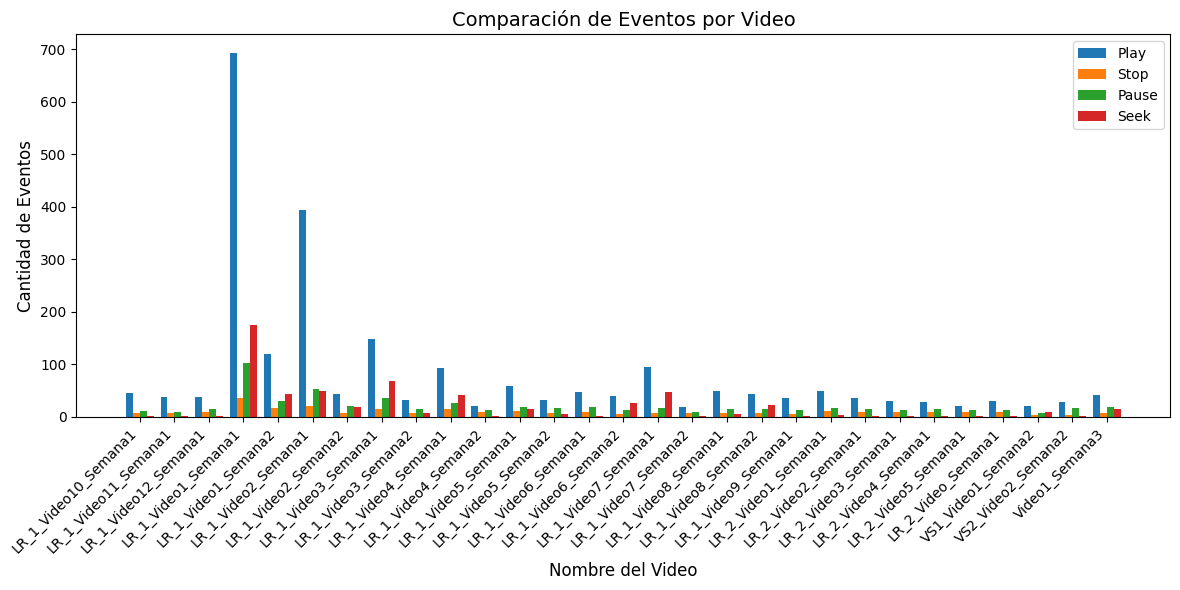

In [7]:
ruta_base = "C:\\Users\\nahom\\OneDrive - Universidad Técnica Particular de Loja - UTPL\\Curso Documentos Accesibles\\CSV\\analisis-codigo\\analizar_datos_open_campus\\Open Campus\\json\\docs\\jsonl\\"
archivos_eventos = {
    'Play': 'play_video.jsonl',
    'Stop': 'stop_video.jsonl',
    'Pause': 'pause_video.jsonl',
    'Seek': 'seek_video.jsonl'
}

graficar_eventos(ruta_base, archivos_eventos, mapeo_codigos)